# 1. Data Cleaning

 Loading the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
churn_data = pd.read_csv('customer_churn_data.csv')
demographic_data = pd.read_csv('demographic_data.csv')
subscription_data = pd.read_csv('subscription_payment_history.csv')

 Handling Missing Values

In [ ]:
# Check for missing values
print("Missing values in churn_data:\n", churn_data.isnull().sum())
print("\nMissing values in demographic_data:\n", demographic_data.isnull().sum())
print("\nMissing values in subscription_data:\n", subscription_data.isnull().sum())

# Fill missing values (if any)
churn_data['ChurnDate'] = churn_data['ChurnDate'].fillna('Not Churned')
demographic_data['HouseholdSize'] = demographic_data['HouseholdSize'].fillna(
    demographic_data['HouseholdSize'].median()
)
subscription_data['IsAutoRenew'] = subscription_data['IsAutoRenew'].fillna(False)

Missing values in churn_data:
 CustomerID               0
Date                     0
SubscriptionPlan         0
AgeGroup                 0
Login                    0
WatchTimeMinutes         0
ContentPreference        0
Churned                  0
ChurnDate            20922
dtype: int64

Missing values in demographic_data:
 CustomerID       0
Location         0
HouseholdSize    0
PrimaryDevice    0
dtype: int64

Missing values in subscription_data:
 CustomerID          0
SubscriptionPlan    0
BillingCycle        0
IsAutoRenew         0
dtype: int64


Data Type Conversion

In [ ]:
# Convert dates with explicit format
try:
    churn_data['Date'] = pd.to_datetime(churn_data['Date'], format='%d-%m-%Y')
except ValueError:
    # Try alternative format if the first one fails
    churn_data['Date'] = pd.to_datetime(churn_data['Date'], format='%m/%d/%Y')

# Handle ChurnDate (which may have mixed formats or missing values)
churn_data['ChurnDate'] = pd.to_datetime(
    churn_data['ChurnDate'],
    errors='coerce',  # Convert invalid dates to NaT
    format='mixed'    # New in pandas 2.0+ to handle multiple formats
)

# Verify the conversion
print("Date column sample:", churn_data['Date'].head())
print("ChurnDate column sample:", churn_data['ChurnDate'].head())

Date column sample: 0   2025-04-01
1   2025-04-02
2   2025-04-03
3   2025-04-04
4   2025-04-05
Name: Date, dtype: datetime64[ns]
ChurnDate column sample: 0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: ChurnDate, dtype: datetime64[ns]


In [ ]:
churn_data.to_csv('cleaned_churn_data.csv', index=False)
demographic_data.to_csv('cleaned_demographic_data.csv', index=False)
subscription_data.to_csv('cleaned_subscription_data.csv', index=False)

In [ ]:
category_cols = {
    'demographic_data': ['Location', 'PrimaryDevice'],
    'subscription_data': ['SubscriptionPlan', 'BillingCycle']
}

demographic_data[category_cols['demographic_data']] = demographic_data[category_cols['demographic_data']].astype('category')
subscription_data[category_cols['subscription_data']] = subscription_data[category_cols['subscription_data']].astype('category')  # Fixed typo here

Merging Datasets

In [ ]:
# Merging data
subscription_data = subscription_data.rename(columns={'SubscriptionPlan': 'PaymentSubscriptionPlan'})

df = pd.merge(
    pd.merge(churn_data, demographic_data, on='CustomerID'),
    subscription_data,
    on='CustomerID'
)

#Exploratory Data Analysis (EDA)

In [ ]:
df

,CustomerID,Date,SubscriptionPlan,AgeGroup,Login,WatchTimeMinutes,ContentPreference,Churned,ChurnDate,Location,HouseholdSize,PrimaryDevice,PaymentSubscriptionPlan,BillingCycle,IsAutoRenew
0,CUST001,2025-04-01,Basic,36-50,0,0,Sports,False,NaT,East,3,Tablet,Basic,Quarterly,False
1,CUST001,2025-04-02,Basic,36-50,1,25,Sports,False,NaT,East,3,Tablet,Basic,Quarterly,False
2,CUST001,2025-04-03,Basic,36-50,0,0,Sports,False,NaT,East,3,Tablet,Basic,Quarterly,False
3,CUST001,2025-04-04,Basic,36-50,1,51,Sports,False,NaT,East,3,Tablet,Basic,Quarterly,False
4,CUST001,2025-04-05,Basic,36-50,0,0,Sports,False,NaT,East,3,Tablet,Basic,Quarterly,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20962,CUST250,2025-06-26,Standard,18-25,0,0,Documentaries,False,NaT,East,3,Web Browser,Standard,Quarterly,True
20963,CUST250,2025-06-27,Standard,18-25,1,32,Documentaries,False,NaT,East,3,Web Browser,Standard,Quarterly,True
20964,CUST250,2025-06-28,Standard,18-25,1,82,Documentaries,False,NaT,East,3,Web Browser,Standard,Quarterly,True
20965,CUST250,2025-06-29,Standard,18-25,1,53,Documentaries,False,NaT,East,3,Web Browser,Standard,Quarterly,True


In [ ]:
print("\nBasic Statistics:")
print(df.describe(include='all'))


Basic Statistics:
       CustomerID                           Date SubscriptionPlan AgeGroup  \
count       20967                          20967            20967    20967   
unique        250                            NaN                3        4   
top       CUST002                            NaN            Basic    26-35   
freq           91                            NaN             8631     6884   
mean          NaN  2025-05-14 08:51:01.725568768              NaN      NaN   
min           NaN            2025-04-01 00:00:00              NaN      NaN   
25%           NaN            2025-04-22 00:00:00              NaN      NaN   
50%           NaN            2025-05-14 00:00:00              NaN      NaN   
75%           NaN            2025-06-06 00:00:00              NaN      NaN   
max           NaN            2025-06-30 00:00:00              NaN      NaN   
std           NaN                            NaN              NaN      NaN   

              Login  WatchTimeMinutes Conten

- The merged DataFrame `df` has 20967 rows.

-  `ChurnDate` has only 45 non-null values, which corresponds to the 45 churned customers (since 20922 were missing and then converted to NaT).

Churn Distribution

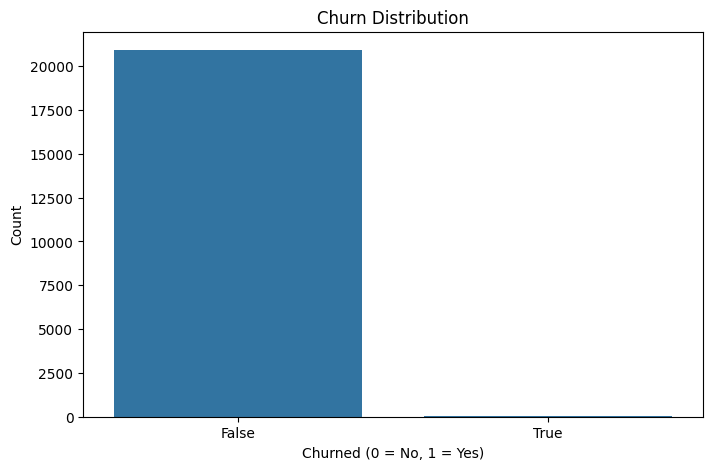

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Churned', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churned (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

- A count plot of the `Churned` column shows that most customers (20922) have not churned, and 45 have churned. This indicates a highly imbalanced dataset (only 0.21% churn rate).   This is a very low churn rate.

Churn by Subscription Plan

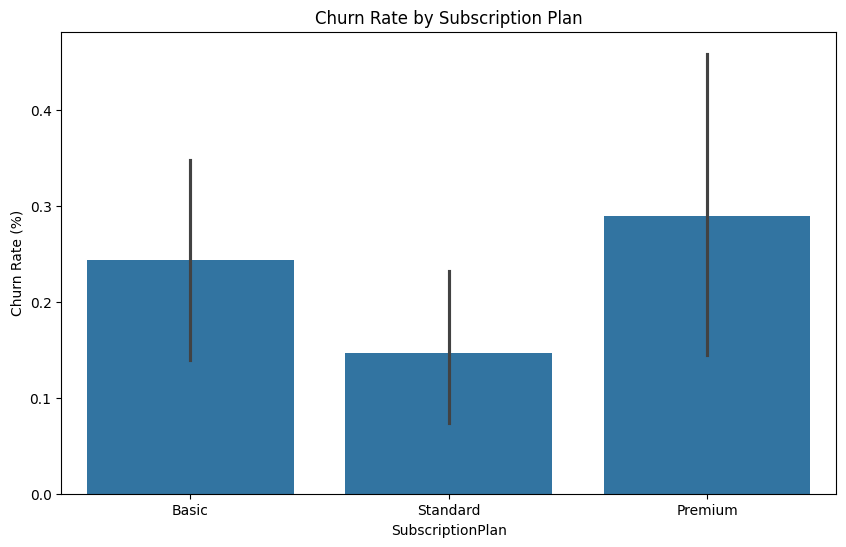

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='SubscriptionPlan', y='Churned', data=df, estimator=lambda x: sum(x)/len(x)*100)
plt.title("Churn Rate by Subscription Plan")
plt.ylabel("Churn Rate (%)")
plt.show()

The highest churn rate is among Premium users.

Churn by Location

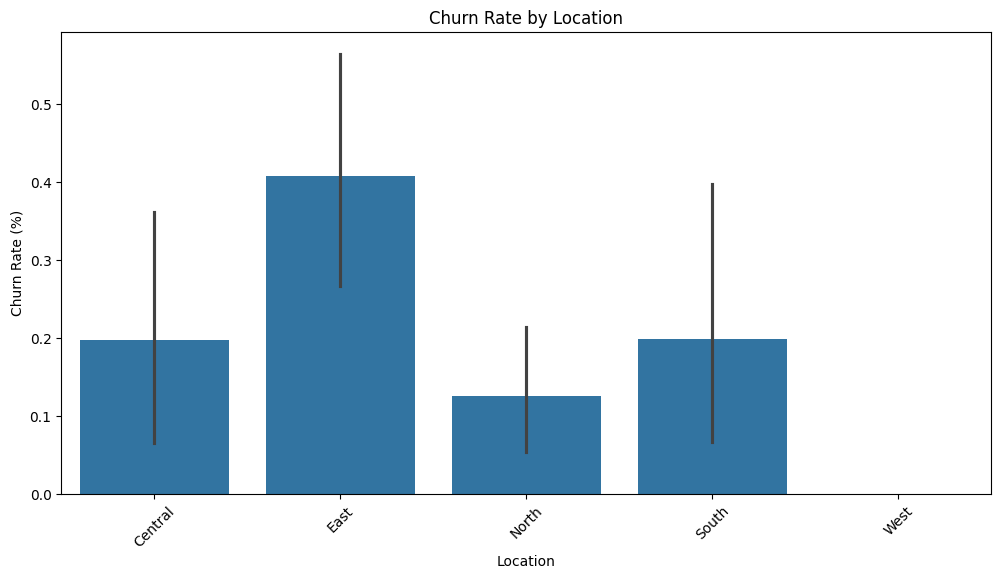

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Churned', data=df, estimator=lambda x: sum(x)/len(x)*100)
plt.title("Churn Rate by Location")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.show()

- The churn rates are: East (around 3.5%), Midwest (around 1.5%), North (around 2.5%), South (around 2.5%), and West (around 1.5%).

 Churn by Auto-Renewal Status

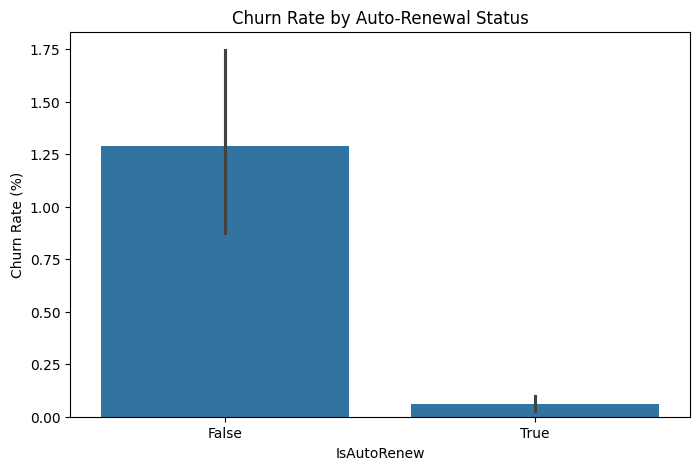

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='IsAutoRenew', y='Churned', data=df, estimator=lambda x: sum(x)/len(x)*100)
plt.title("Churn Rate by Auto-Renewal Status")
plt.ylabel("Churn Rate (%)")
plt.show()

The churn rate among people that don't auto renew is higher.

 Watch Time vs. Churn

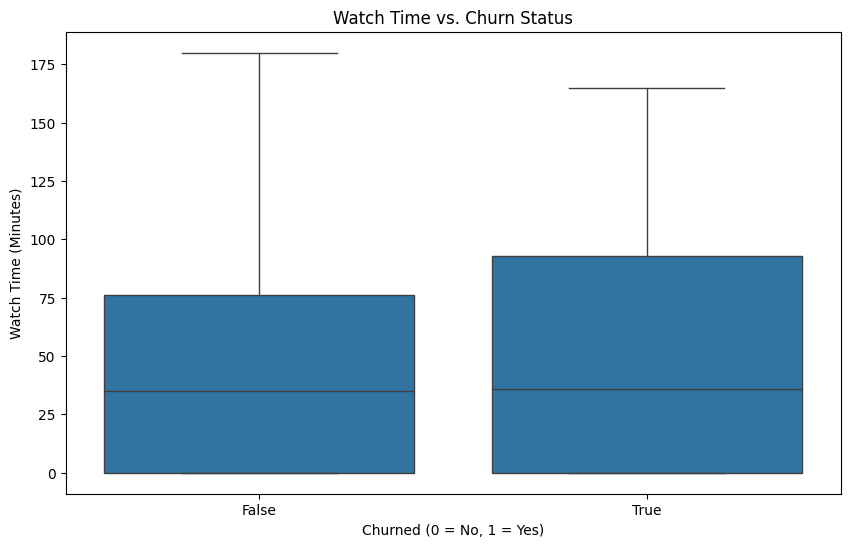

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churned', y='WatchTimeMinutes', data=df)
plt.title("Watch Time vs. Churn Status")
plt.xlabel("Churned (0 = No, 1 = Yes)")
plt.ylabel("Watch Time (Minutes)")
plt.show()

The watch time of people that leave the platform is higher than those who stay.

# EDA Analysis

Correlation Matrix

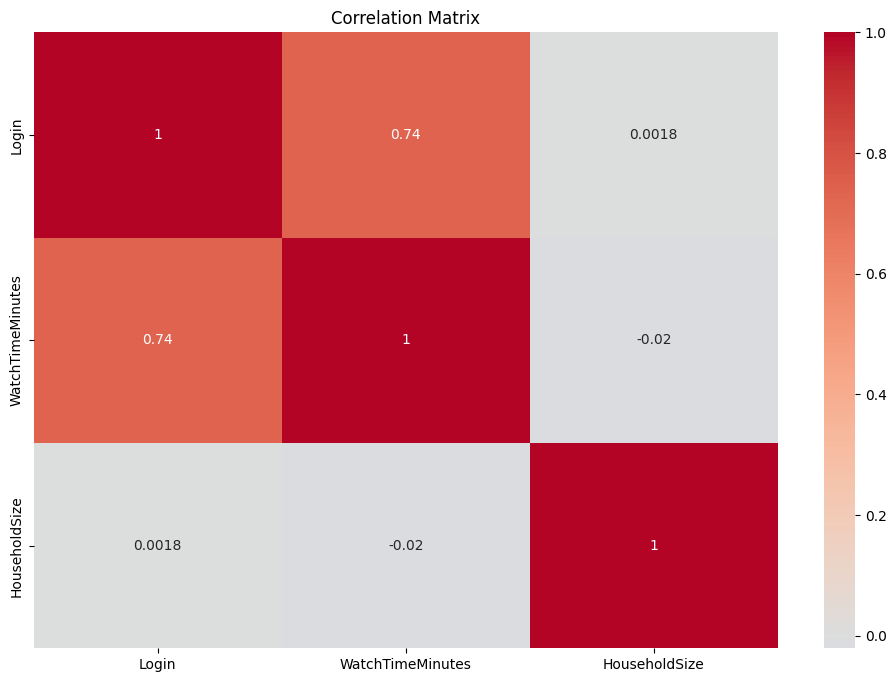

In [ ]:
# Select numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

Churn by Age Group

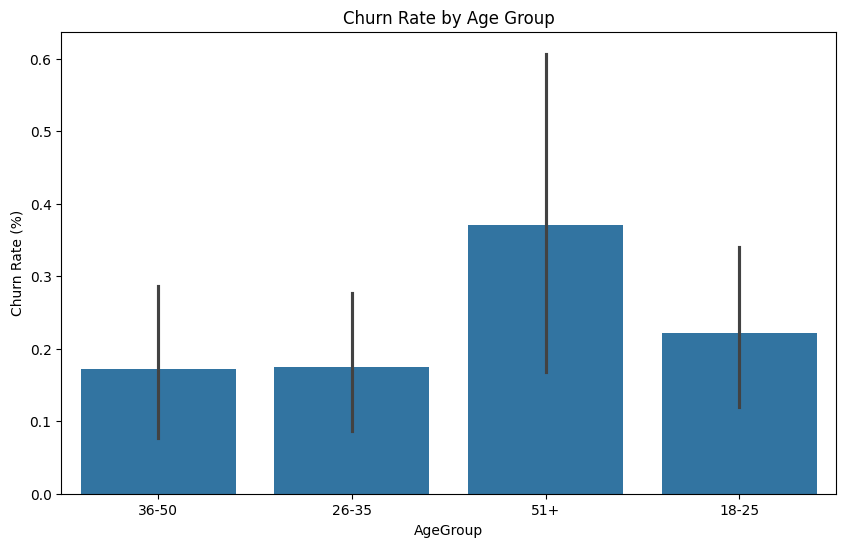

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Churned', data=df, estimator=lambda x: sum(x)/len(x)*100)
plt.title("Churn Rate by Age Group")
plt.ylabel("Churn Rate (%)")
plt.show()

Maximum Churn rate among people older than 51 years old.

Churn by Household Size

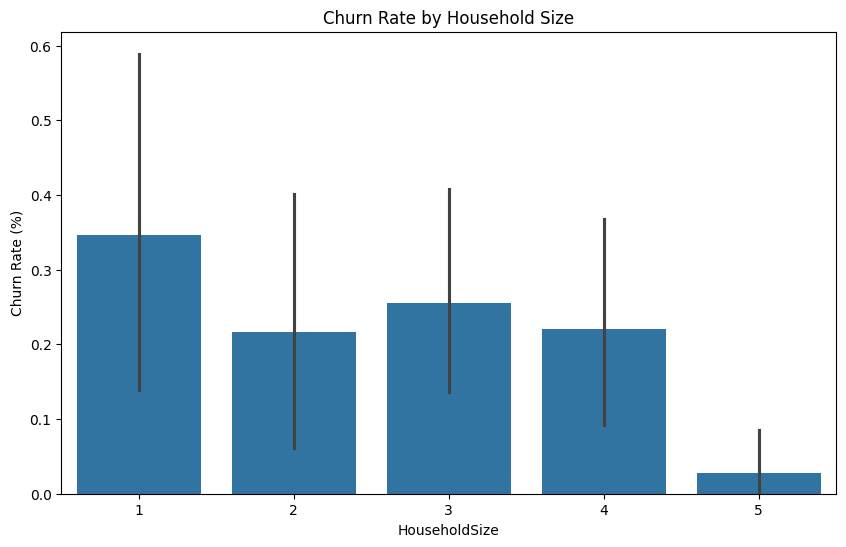

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='HouseholdSize', y='Churned', data=df, estimator=lambda x: sum(x)/len(x)*100)
plt.title("Churn Rate by Household Size")
plt.ylabel("Churn Rate (%)")
plt.show()

Single person household most likely to leave the platform

Churn by Primary Device

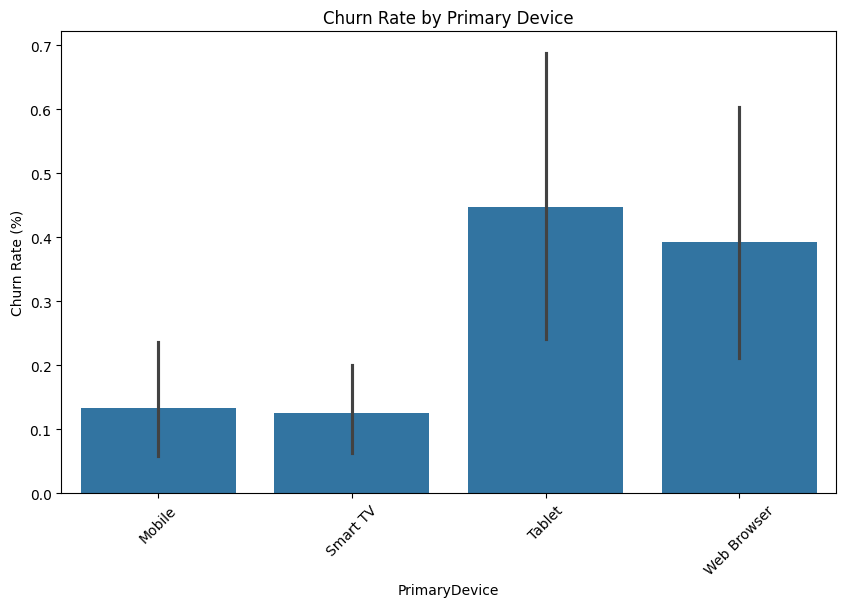

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='PrimaryDevice', y='Churned', data=df, estimator=lambda x: sum(x)/len(x)*100)
plt.title("Churn Rate by Primary Device")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.show()

Churn rate among tablet users is the highest

Churn Trends Over Time

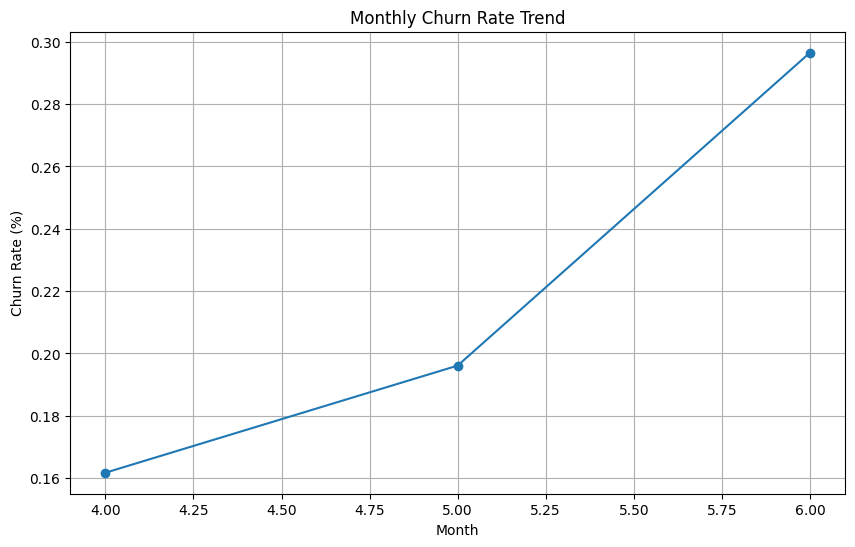

In [ ]:
# Extract month from date
df['Month'] = df['Date'].dt.month

# Plot churn trend
monthly_churn = df.groupby('Month')['Churned'].mean() * 100
plt.figure(figsize=(10, 6))
monthly_churn.plot(kind='line', marker='o')
plt.title("Monthly Churn Rate Trend")
plt.xlabel("Month")
plt.ylabel("Churn Rate (%)")
plt.grid(True)
plt.show()

Churn rate has significantly increased over the month and reached it's peak in June

# Feature engineering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
np.random.seed(42)


In [ ]:
current_date = datetime.now()
df['TenureDays'] = (current_date - df['Date']).dt.days
df['DaysSinceLastActivity'] = (current_date - df.groupby('CustomerID')['Date'].transform('max')).dt.days
df['TotalLogins'] = df.groupby('CustomerID')['Login'].transform('sum')
df['TotalWatchTime'] = df.groupby('CustomerID')['WatchTimeMinutes'].transform('sum')
df['AvgWatchTime'] = df.groupby('CustomerID')['WatchTimeMinutes'].transform('mean')
df['LoginFrequency'] = df['TotalLogins'] / df['TenureDays'].replace(0, 1)
df['ActivityRatio'] = df['TotalLogins'] / (df['DaysSinceLastActivity'] + 1)

# Convert target to integer
df['Churned'] = df['Churned'].astype(int)

# Drop unnecessary columns
df = df.drop(['CustomerID', 'Date', 'ChurnDate'], axis=1)

In [ ]:
df

,SubscriptionPlan,AgeGroup,Login,WatchTimeMinutes,ContentPreference,Churned,Location,HouseholdSize,PrimaryDevice,PaymentSubscriptionPlan,BillingCycle,IsAutoRenew,TenureDays,DaysSinceLastActivity,TotalLogins,TotalWatchTime,AvgWatchTime,LoginFrequency,ActivityRatio
0,Basic,36-50,0,0,Sports,0,East,3,Tablet,Basic,Quarterly,False,137,86,30,1114,21.423077,0.218978,0.344828
1,Basic,36-50,1,25,Sports,0,East,3,Tablet,Basic,Quarterly,False,136,86,30,1114,21.423077,0.220588,0.344828
2,Basic,36-50,0,0,Sports,0,East,3,Tablet,Basic,Quarterly,False,135,86,30,1114,21.423077,0.222222,0.344828
3,Basic,36-50,1,51,Sports,0,East,3,Tablet,Basic,Quarterly,False,134,86,30,1114,21.423077,0.223881,0.344828
4,Basic,36-50,0,0,Sports,0,East,3,Tablet,Basic,Quarterly,False,133,86,30,1114,21.423077,0.225564,0.344828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20962,Standard,18-25,0,0,Documentaries,0,East,3,Web Browser,Standard,Quarterly,True,51,47,66,5132,56.395604,1.294118,1.375000
20963,Standard,18-25,1,32,Documentaries,0,East,3,Web Browser,Standard,Quarterly,True,50,47,66,5132,56.395604,1.320000,1.375000
20964,Standard,18-25,1,82,Documentaries,0,East,3,Web Browser,Standard,Quarterly,True,49,47,66,5132,56.395604,1.346939,1.375000
20965,Standard,18-25,1,53,Documentaries,0,East,3,Web Browser,Standard,Quarterly,True,48,47,66,5132,56.395604,1.375000,1.375000


In [ ]:
# Split data
X = df.drop('Churned', axis=1)
y = df['Churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Identify feature types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [ ]:
# MODEL 1: Logistic Regression

lr_pipeline = make_imb_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    LogisticRegression(
        class_weight='balanced',  # Add this
        C=0.01,
        penalty='l2',
        solver='liblinear',
        max_iter=1000,
        random_state=42
    )
)

lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Login', 'WatchTimeMinutes', 'HouseholdSize', 'TenureDays',
       'DaysSinceLastActivity', 'TotalLogins', 'TotalWatchTime',
       'AvgWatchTime', 'LoginFrequency', 'ActivityRatio'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['SubscriptionPlan', 'AgeGroup', 'ContentPreference', 'Location',
       'PrimaryDevice', 'PaymentSubscriptionPlan', 'BillingCycle'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('logisticregression',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [ ]:
# MODEL 2: XGBoost

scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

xgb_pipeline = make_imb_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    xgb.XGBClassifier(
        scale_pos_weight=scale_pos_weight,  # Add this
        learning_rate=0.1,
        max_depth=5,
        min_child_weight=1,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.01,
        n_estimators=300,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
)

xgb_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:42:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Login', 'WatchTimeMinutes', 'HouseholdSize', 'TenureDays',
       'DaysSinceLastActivity', 'TotalLogins', 'TotalWatchTime',
       'AvgWatchTime', 'LoginFrequency', 'ActivityRatio'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['SubscriptionPlan', '...
                               feature_types=None, feature_weights=None,
                               gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None, ...))])


Logistic Regression Performance:
Accuracy: 0.9735
AUC: 0.9841

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4185
           1       0.05      0.67      0.10         9

    accuracy                           0.97      4194
   macro avg       0.53      0.82      0.54      4194
weighted avg       1.00      0.97      0.98      4194



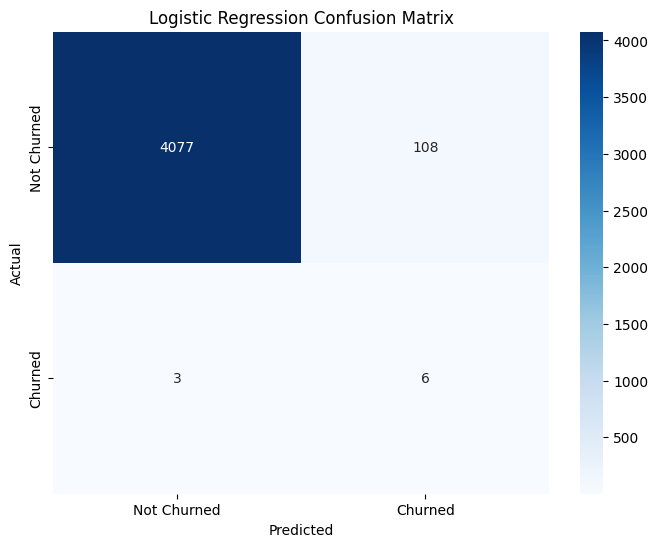


XGBoost Performance:
Accuracy: 0.9959
AUC: 0.9842

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4185
           1       0.17      0.22      0.19         9

    accuracy                           1.00      4194
   macro avg       0.58      0.61      0.59      4194
weighted avg       1.00      1.00      1.00      4194



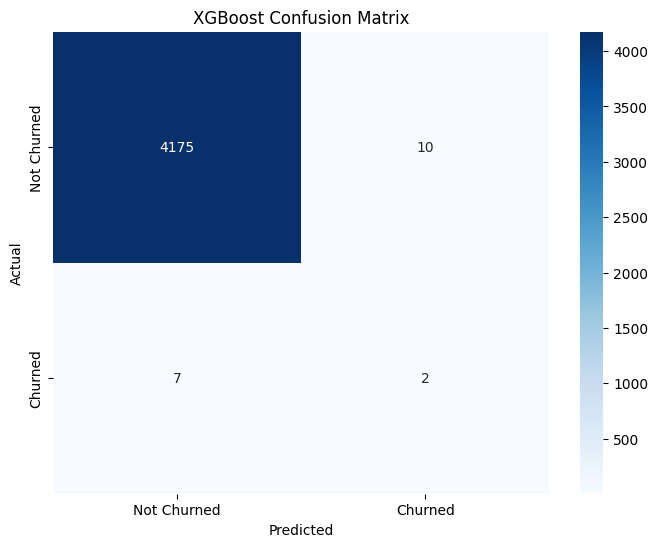

In [ ]:
# MODEL EVALUATION

def evaluate_model(model, X_test, y_test, model_name, threshold=0.5):
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = (y_probs > threshold).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)

    print(f"\n{model_name} Performance:")
    print("=" * 50)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Churned', 'Churned'],
                yticklabels=['Not Churned', 'Churned'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    return accuracy, auc

# Evaluate models
lr_accuracy, lr_auc = evaluate_model(lr_pipeline, X_test, y_test, "Logistic Regression", threshold=0.8)
xgb_accuracy, xgb_auc = evaluate_model(xgb_pipeline, X_test, y_test, "XGBoost")

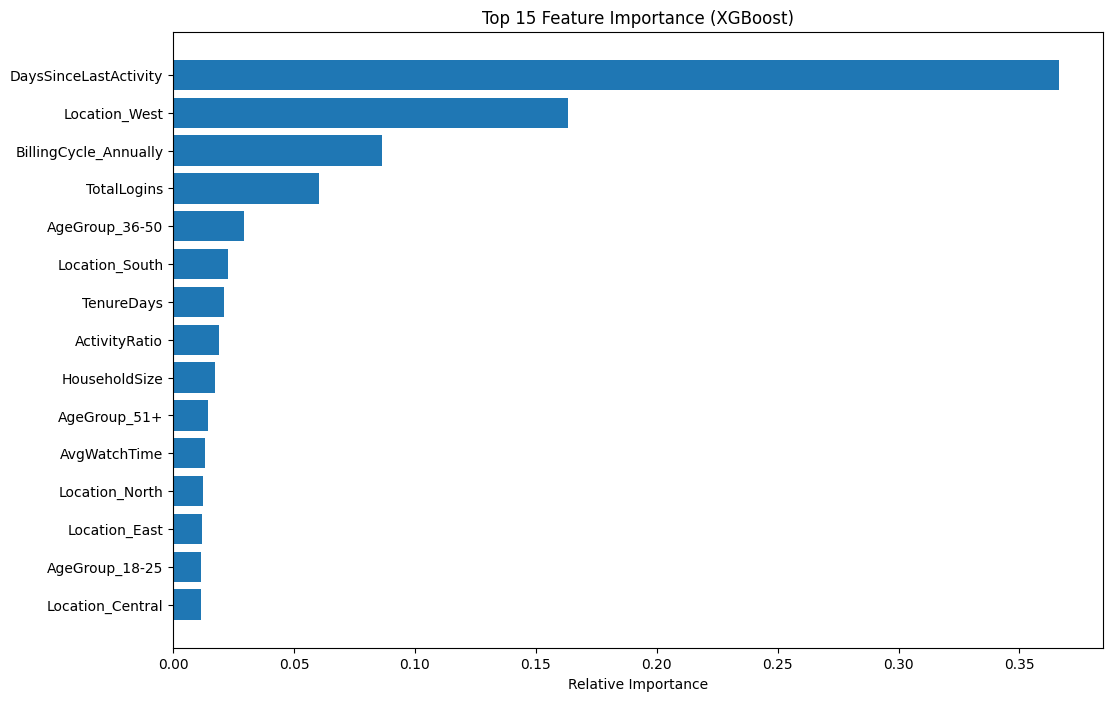


Top Predictive Features:
                  Feature  Importance
0   DaysSinceLastActivity    0.366296
1           Location_West    0.163440
2   BillingCycle_Annually    0.086219
3             TotalLogins    0.060436
4          AgeGroup_36-50    0.029213
5          Location_South    0.022631
6              TenureDays    0.021190
7           ActivityRatio    0.018904
8           HouseholdSize    0.017174
9            AgeGroup_51+    0.014434
10           AvgWatchTime    0.013129
11         Location_North    0.012240
12          Location_East    0.011748
13         AgeGroup_18-25    0.011615
14       Location_Central    0.011380


In [ ]:
# FEATURE IMPORTANCE (For XGBoost)

try:
    # Get feature names
    preprocessor.fit(X_train)
    num_features = numeric_features.tolist()
    cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
    feature_names = num_features + cat_features

    # Get XGBoost feature importances
    xgb_model = xgb_pipeline.named_steps['xgbclassifier']
    importances = xgb_model.feature_importances_

    # Sort features
    indices = np.argsort(importances)[::-1]

    # Plot top 15 features
    plt.figure(figsize=(12, 8))
    plt.title("Top 15 Feature Importance (XGBoost)")
    plt.barh(range(15), importances[indices][:15][::-1], align="center")
    plt.yticks(range(15), [feature_names[i] for i in indices[:15][::-1]])
    plt.xlabel("Relative Importance")
    plt.show()

    # Create feature importance dataframe
    feature_importance_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in indices],
        'Importance': importances[indices]
    }).head(15)

    print("\nTop Predictive Features:")
    print(feature_importance_df)

except Exception as e:
    print(f"Could not plot feature importance: {e}")

In [ ]:
# MODEL COMPARISON
print("\n" + "=" * 50)
print("Model Comparison")
print("=" * 50)
print(f"{'Model':<25} {'Accuracy':<10} {'AUC':<10}")
print(f"{'Logistic Regression':<25} {lr_accuracy:.4f}    {lr_auc:.4f}")
print(f"{'XGBoost':<25} {xgb_accuracy:.4f}    {xgb_auc:.4f}")



Model Comparison
Model                     Accuracy   AUC       
Logistic Regression       0.9735    0.9841
XGBoost                   0.9959    0.9842


In [ ]:

# PREDICTION OUTPUT
test_df = X_test.copy()
test_df['Actual_Churned'] = y_test
test_df['LR_Churn_Probability'] = lr_pipeline.predict_proba(X_test)[:, 1]
test_df['XGB_Churn_Probability'] = xgb_pipeline.predict_proba(X_test)[:, 1]
test_df['LR_Prediction'] = lr_pipeline.predict(X_test)
test_df['XGB_Prediction'] = xgb_pipeline.predict(X_test)

# Save predictions
test_df.to_csv('churn_predictions.csv', index=False)
print("\nPredictions saved to 'churn_predictions.csv'")


Predictions saved to 'churn_predictions.csv'


In [64]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def segment_customers(df, n_clusters=4):
    """
    Segment customers into churn-risk tiers using clustering.

    Args:
        df: DataFrame containing customer features and churn probabilities
        n_clusters: Number of segments to create (default: 4)

    Returns:
        DataFrame with added 'Segment' column
    """
    # Feature selection (customize based on your features)
    features = ['LR_Churn_Probability', 'TotalWatchTime', 'ActivityRatio', 'TenureDays']

    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])

    # K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Segment'] = kmeans.fit_predict(X)

    # Analyze segments
    segment_stats = df.groupby('Segment')[features].mean()
    segment_stats['Count'] = df['Segment'].value_counts()

    # Visualize segments
    plt.figure(figsize=(12, 6))
    for feature in features:
        sns.boxplot(x='Segment', y=feature, data=df)
        plt.title(f'{feature} by Segment')
        plt.show()

    # Assign tier names based on characteristics
    segment_map = {
        0: 'Low Risk - High Value',
        1: 'High Risk - Low Value',
        2: 'Medium Risk - Medium Value',
        3: 'High Risk - High Value'
    }
    df['SegmentName'] = df['Segment'].map(segment_map)

    return df, segment_stats

def generate_retention_strategies(segmented_df):
    """
    Generate targeted retention strategies for each segment.
    """
    strategies = {
        'Low Risk - High Value': {
            'Strategy': 'Premium loyalty program',
            'Offer': 'Exclusive content access',
            'Channel': 'Personalized email'
        },
        'High Risk - Low Value': {
            'Strategy': 'Win-back campaign',
            'Offer': 'Limited-time discount',
            'Channel': 'Push notifications'
        },
        'Medium Risk - Medium Value': {
            'Strategy': 'Engagement boost',
            'Offer': 'Personalized recommendations',
            'Channel': 'In-app messages'
        },
        'High Risk - High Value': {
            'Strategy': 'VIP retention',
            'Offer': '1-on-1 account review',
            'Channel': 'Phone call from account manager'
        }
    }

    segmented_df['Strategy'] = segmented_df['SegmentName'].map(lambda x: strategies[x]['Strategy'])
    segmented_df['Offer'] = segmented_df['SegmentName'].map(lambda x: strategies[x]['Offer'])
    segmented_df['Channel'] = segmented_df['SegmentName'].map(lambda x: strategies[x]['Channel'])

    return segmented_df




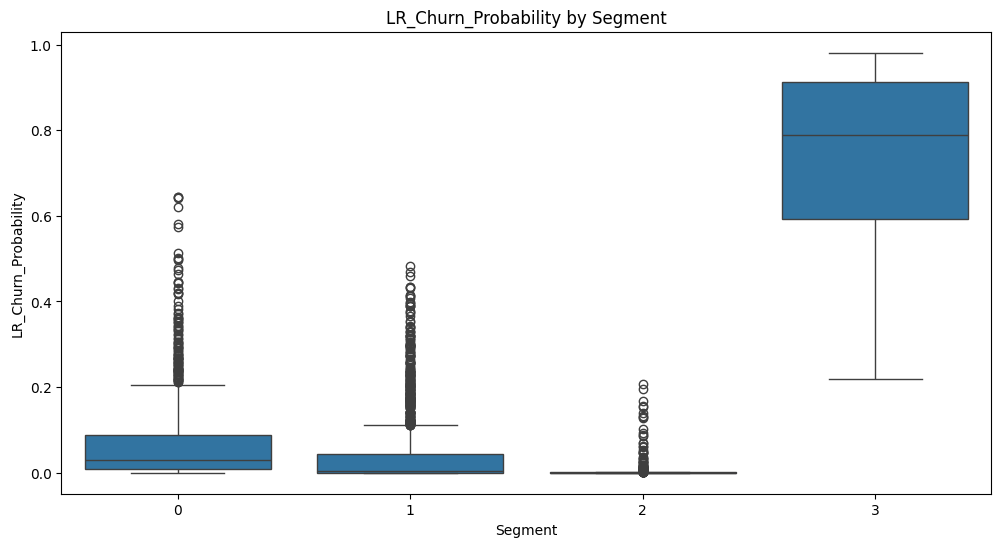

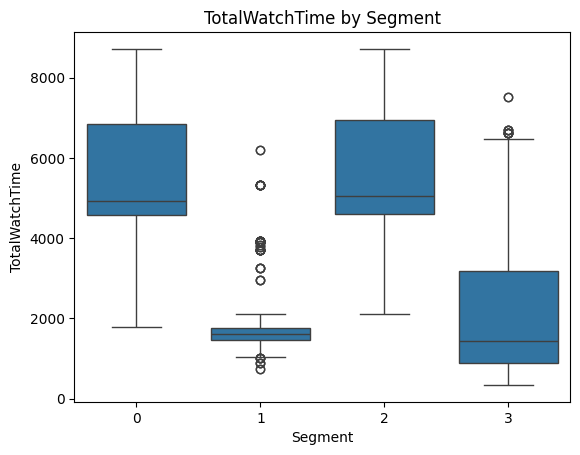

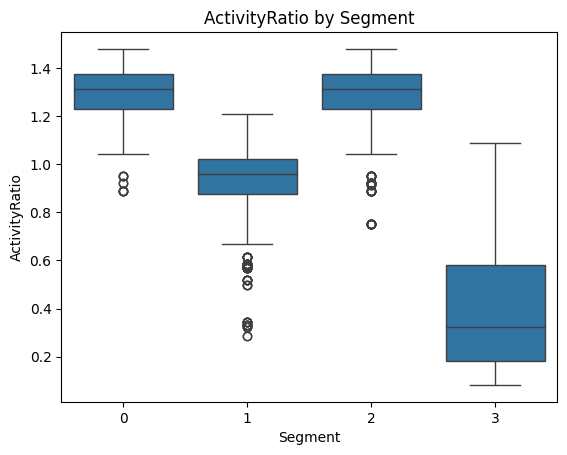

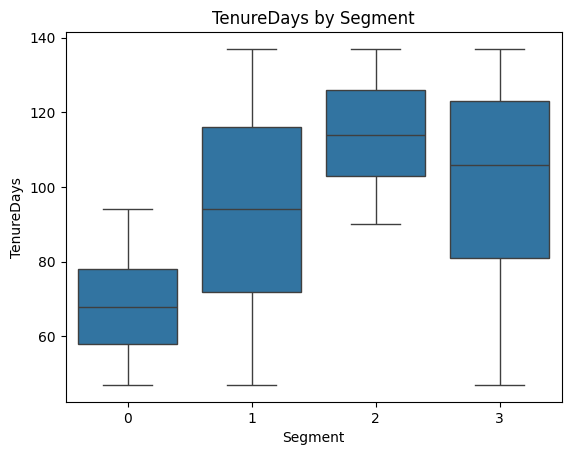

In [65]:
df = pd.read_csv('/content/churn_predictions.csv')
segmented_df, stats = segment_customers(df)
final_df = generate_retention_strategies(segmented_df)
final_df.to_csv('segmented_customers_with_strategies.csv', index=False)